# Homework 2 Question 1

## Imports

In [0]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Preparing image data

In [0]:
# Load training and testing data into variables then format
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

train_images = train_images_original.reshape((60000, 28, 28))
train_images = train_images.astype('float64') / 255

test_images = test_images_original.reshape((10000,  28, 28))
test_images = test_images.astype('float64') / 255

train_images_avg = np.zeros((60000, 28))
test_images_avg = np.zeros((10000, 28))

for i in range(len(train_images)):
  train_images_avg[i] = np.mean(train_images[i], axis = 0) + np.mean(train_images[i], axis = 1)

for i in range(len(test_images)):
  test_images_avg[i] = np.mean(test_images[i], axis = 0) + np.mean(test_images[i], axis = 1)

# Create labels
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)


## Build the model

In [0]:
# Setup the layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28, )))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               14848     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 19,978
Trainable params: 19,978
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Complie the model
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# train the model
epochs = 20
history = network.fit(train_images_avg, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images_avg, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/step - loss: 1.3180 - acc: 0.5967 - val_loss: 1.0716 - val_acc: 0.6612
Epoch 2/20
60000/60000 [==============================] - 1s 16us/step - loss: 1.0404 - acc: 0.6621 - val_loss: 0.9803 - val_acc: 0.6823
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.9603 - acc: 0.6856 - val_loss: 0.9138 - val_acc: 0.6983
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.9077 - acc: 0.7037 - val_loss: 0.8862 - val_acc: 0.7036
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.8690 - acc: 0.7151 - val_loss: 0.8421 - val_acc: 0.7203
Epoch 6/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.8402 - acc: 0.7249 - val_loss: 0.8210 - val_acc: 0.7322
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.8178 - acc: 0.7318 - val_loss: 0.8075 - val_acc

### Training/test loss/accuracy

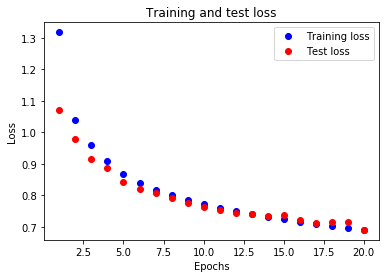

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

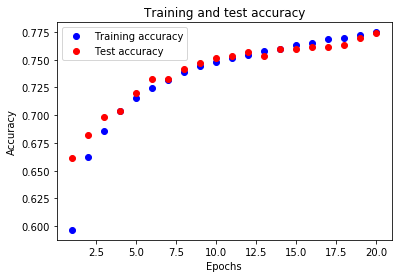

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()